# Pair  Programming Métricas

In [1]:

# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns


#  Modelado y evaluación
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


#  Crossvalidation
# ------------------------------------------------------------------------------
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

En el pair programming anterior creastéis vuestro primer modelo de machine learning usando la regresion Lineal. Es el momento, que con vuestros datos evaluéis si es bueno haciendo predicciones. 
Los objetivo de este pairprogramming son:
- Calculéis las métricas para vuestro modelo
- Discutid los resultados de las métricas y extraed conclusiones
- Guardad los resultados de las métricas en un csv para usarlo más adelante.

In [2]:
df= pd.read_csv ('data/df_para_metricas.csv', index_col=0)

In [3]:
X = df.drop("charges_Sklearn", axis = 1)
y = df["charges_Sklearn"]

In [11]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [5]:
lr = LinearRegression(n_jobs=-1)

In [6]:
lr.fit(x_train, y_train)

LinearRegression(n_jobs=-1)

In [7]:
y_predict_train = lr.predict(x_train) 
y_predict_test = lr.predict(x_test) 

In [8]:
train_df = pd.DataFrame({'Real': y_train, 'Predicted': y_predict_train, 'Set': ['Train']*len(y_train)})
test_df  = pd.DataFrame({'Real': y_test,  'Predicted': y_predict_test,  'Set': ['Test']*len(y_test)})
resultados = pd.concat([train_df,test_df], axis = 0)
resultados.head()

,Real,Predicted,Set
331,0.615816,0.674191,Train
409,0.277641,0.316840,Train
76,0.027139,0.084873,Train
866,0.064706,0.081005,Train
138,0.602735,0.707855,Train


In [9]:
resultados['residuos'] = resultados['Real'] - resultados['Predicted']
resultados.head()

,Real,Predicted,Set,residuos
331,0.615816,0.674191,Train,-0.058375
409,0.277641,0.316840,Train,-0.039199
76,0.027139,0.084873,Train,-0.057735
866,0.064706,0.081005,Train,-0.016299
138,0.602735,0.707855,Train,-0.105119


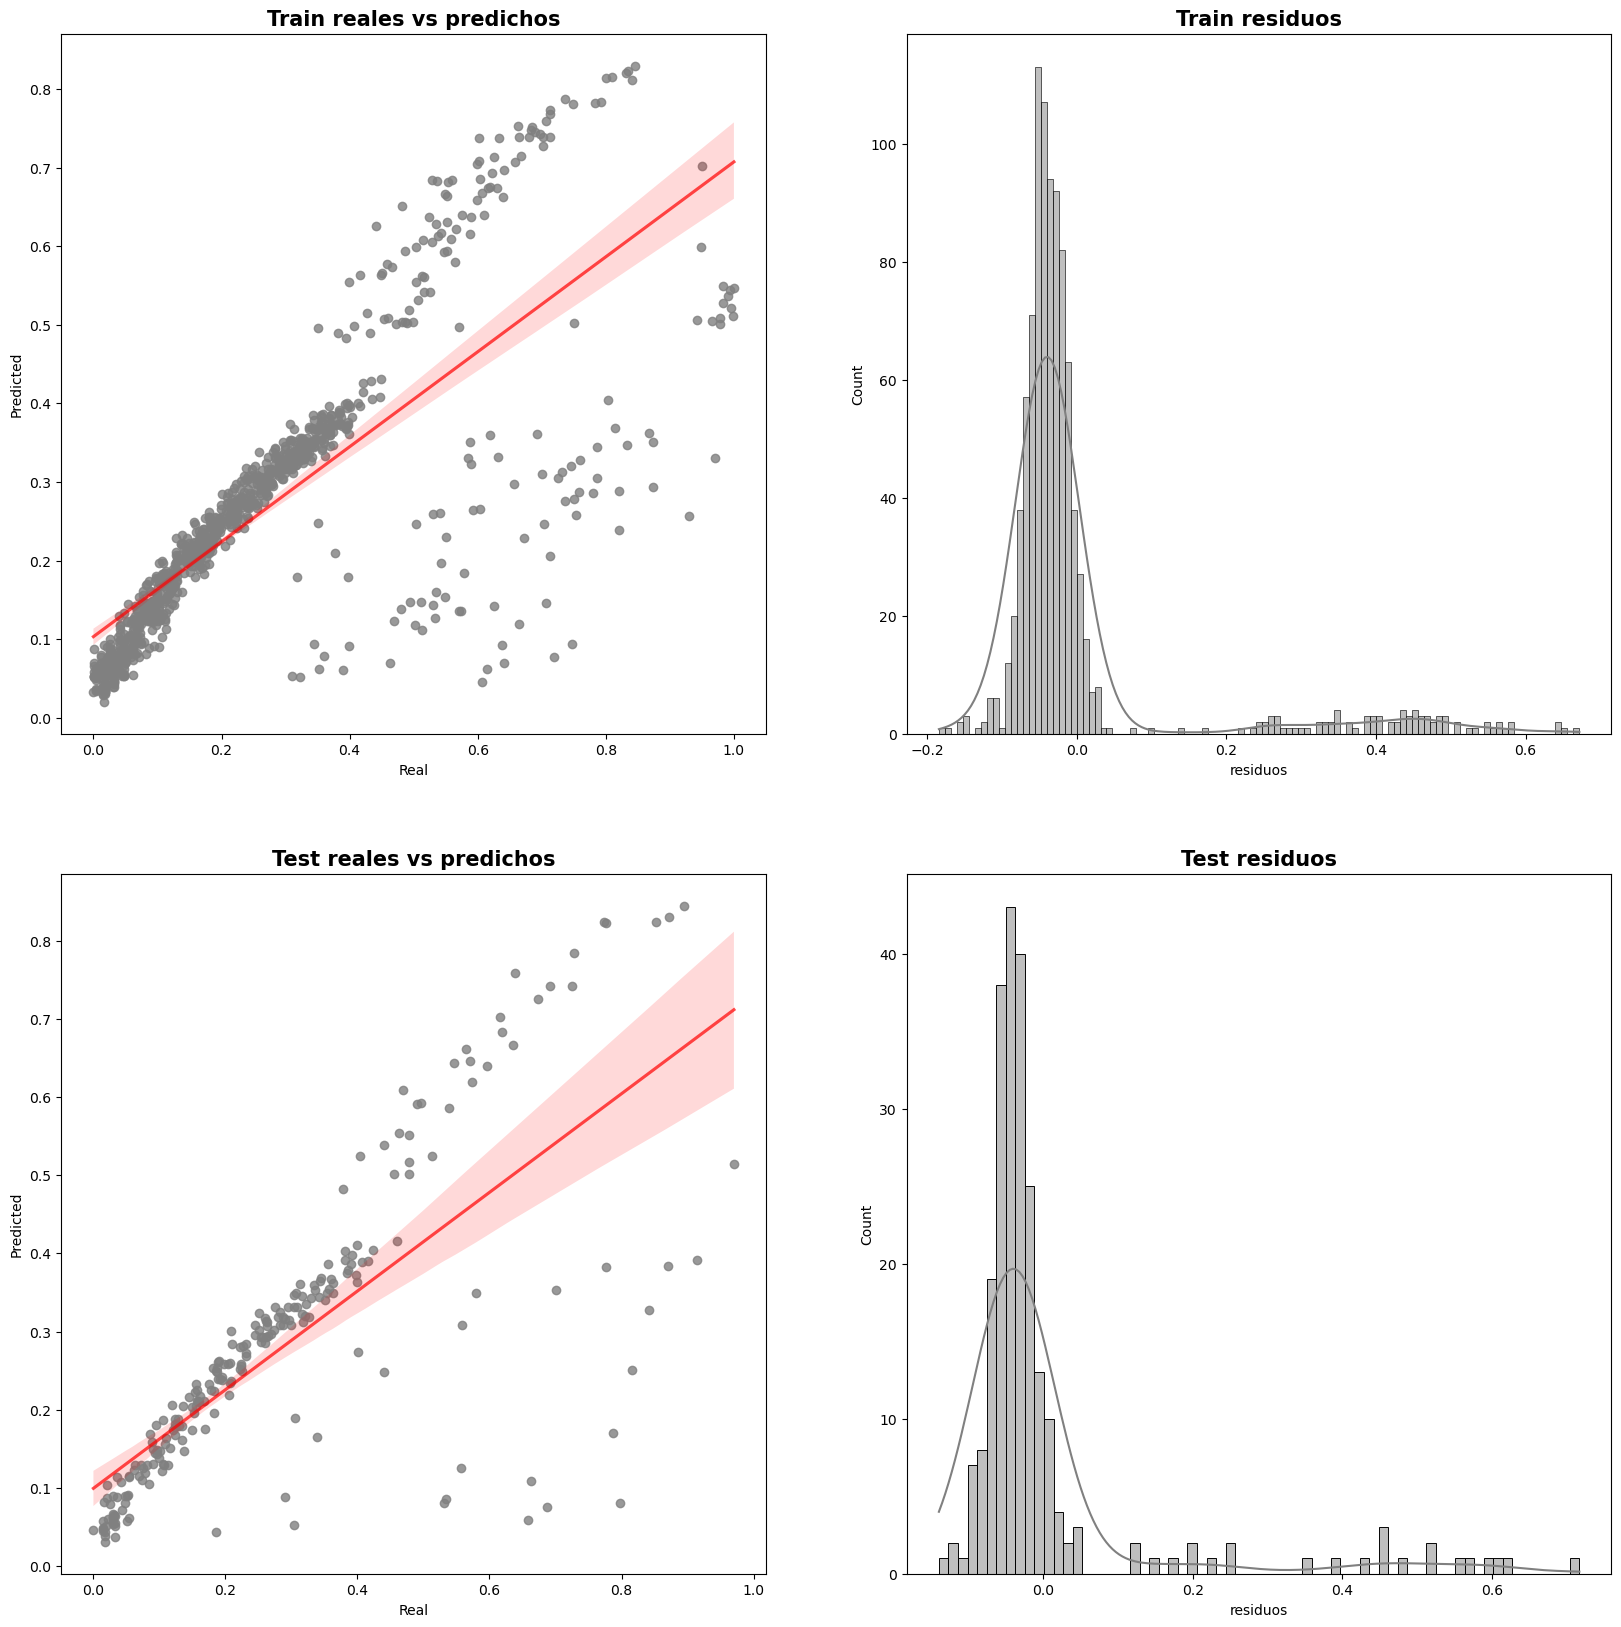

In [12]:
fig, ax = plt.subplots(2,2,figsize=(20,20))


# ploteamos los reales vs los predichos
sns.regplot(data = resultados[resultados['Set'] == "Train"], 
            x = "Real", 
            y = "Predicted", 
            ax = ax[0,0], 
            color = "grey",
            line_kws = {"color": "red", "alpha": 0.7 })


sns.regplot(data = resultados[resultados['Set'] == "Test"], 
            x = "Real",
            y = "Predicted", 
            color = "gray",
            line_kws = {"color": "red", "alpha": 0.7 }, 
            ax = ax[1,0])


# ploteamos los residuos
sns.histplot(resultados[resultados['Set'] == "Train"],
             x="residuos",
             color ="grey",
             kde=True, 
             ax = ax[0,1])


sns.histplot(resultados[resultados['Set'] == "Test"],
             x="residuos",
             color = "grey",
             kde=True, 
             ax = ax[1,1])

ax[0,0].set_title("Train reales vs predichos", fontsize = 15, fontweight = "bold")
ax[0,1].set_title("Train residuos", fontsize = 15, fontweight = "bold")
ax[1,0].set_title("Test reales vs predichos", fontsize = 15, fontweight = "bold")
ax[1,1].set_title("Test residuos", fontsize = 15, fontweight = "bold");

In [13]:
# Para el conjunto de entrenamsiento las méticas han sido
print('Para el conjunto train:')
print('El valor de r2 score es ',r2_score(y_train,y_predict_train))
print('El MAE es',mean_absolute_error(y_train,y_predict_train))
print('El MSE es',mean_squared_error(y_train,y_predict_train))
print('EL RMSE es ',np.sqrt(mean_squared_error(y_train,y_predict_train)))

print('        ')
# Para el conjunto de test las métricas han sido
print('Para el conjunto test:')
print('El valor de r2 score es ',r2_score(y_test,y_predict_test))
print('El MAE es',mean_absolute_error(y_test,y_predict_test))
print('El MSE es',mean_squared_error(y_test,y_predict_test))
print('EL RMSE es ',np.sqrt(mean_squared_error(y_test,y_predict_test)))

Para el conjunto train:
El valor de r2 score es  0.6040362139259797
El MAE es 0.07539257758483965
El MSE es 0.018494282497230174
EL RMSE es  0.13599368550499016
        
Para el conjunto test:
El valor de r2 score es  0.5714413856442806
El MAE es 0.07784362345597341
El MSE es 0.020725965474720554
EL RMSE es  0.14396515368213433


El 0.60 del r2 del train implica que nuestras variables predictoras solo pueden explicar el  60% de la varianza de la variable respuesta.



Según estos datos, nuestros resultados están ajustado ya que no se aprecia ni 'underfitting' ni 'overfitting' ya que las métricas del train y del test son similares.

El RMSE significa que nuestro modelo predice el precio con un  0.13 de error.

Hacemos un describe sobre nuestro df para ver cuales son los valores másximos y mínimos de nuestra variable respuesta y poder compararla con el valor de RMSE. 

Al ver que nuestro máxinmo es 1 y el mínimo es 0, entonces deducimos que hay un 13% de error es mucho.

In [48]:
df.describe()

,charges_Sklearn,age_robust,bmi_robust,children_robust
count,1198.000000,1198.000000,1198.000000,1198.000000
mean,0.264244,0.000267,0.044861,0.042571
std,0.217092,0.562482,0.749756,0.607203
min,0.000000,-0.840000,-1.717581,-0.500000
25%,0.098849,-0.520000,-0.490648,-0.500000
50%,0.218581,0.000000,0.000000,0.000000
75%,0.354817,0.480000,0.509352,0.500000
max,1.000000,1.000000,2.917082,2.000000


Finalmente, la regresión lineal no es un modelo que podamos aplicar a nuestros datos ya que no puede realizar predicciones acertadas.